In [7]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Generation data for France

%store -r CorrFR
%store -r FRGen

CorrFR

,Generation,Max. Value,rho,p,m,c,a,b
0,Wind,356365.0,-0.216491,3.432348e-09,NaN,NaN,-0.003052,196.745126
1,Nuclear,1247909.0,-0.398209,3.749694e-29,NaN,NaN,-1.794195,697.722332


     Wind Predicted [EUR/MWh]  Nuclear Predicted [EUR/MWh]
0                      179.03                        81.09
1                      172.32                        78.25
2                      172.11                        79.10
3                      168.80                        76.94
4                      170.27                        77.05
..                        ...                          ...
725                    134.12                       142.72
726                     77.25                       144.42
727                     91.03                       173.16
728                     77.84                       187.24
729                     66.31                       224.89

[730 rows x 2 columns]


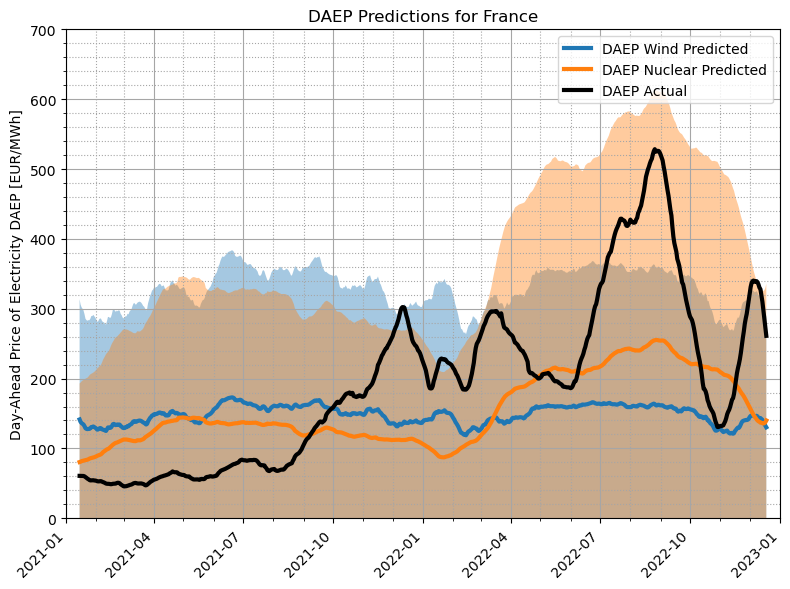

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

plt.title('DAEP Predictions for France')
plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

#ax.plot(FRGen["Date"], FRGen["FR DAEP [EUR/MWh]"], color = "orchid")
#plt.fill_between(FRGen["Date"], FRGen["FR DAEP [EUR/MWh]"], color="orchid")

c = pd.DataFrame(["blue", "lightblue", "green", "aquamarine", "orange", "moccasin"])

DAEPwei = pd.DataFrame()
CorrFR = CorrFR.replace(np.NaN, "N/A")

for i in range(0, len(CorrFR.iloc[:,0])):
    Name = CorrFR.iloc[i,0]
    Gen = FRGen[f"{Name} [MWh]"]
    
    d = CorrFR.iloc[i,1]
    
    if d > 1000000:
        Gen = Gen/1000000
    if 1000000 > d > 1000:
        Gen = Gen/1000
        
    rho = CorrFR.iloc[i,2]
    
    if CorrFR.iloc[i,6] == "N/A":
        m = CorrFR.iloc[i,4]
        c = CorrFR.iloc[i,5]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = m*Gen + c
    if CorrFR.iloc[i,4] == "N/A":
        a = CorrFR.iloc[i,6]
        b = CorrFR.iloc[i,7]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = b*np.exp(a*Gen)
    
    plt.fill_between(FRGen["Date"], (rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
                 (2-rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
    ax.plot(FRGen["Date"], DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
            linewidth=3, label = f"DAEP {Name} Predicted")
    
print(DAEPwei.round(2))

#DAEPwei["SAP Predicted [EUR/MWh]"] = MSAP*CompGasFR["FR Gas SAP [EUR/MWh]"].astype(float)+CSAP
#plt.fill_between(FRGen["Date"], (rhoSAP_BZNFR)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
#                 (2-rhoSAP_BZNFR)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
#ax.plot(FRGen["Date"], DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
#        linewidth=3, color="red", label = "DAEP SAP Predicted")


ax.plot(FRGen["Date"], FRGen["FR DAEP [EUR/MWh]"].rolling(28,  center=True).mean(),
        linewidth=3, color = "black", label="DAEP Actual")

plt.legend()

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 700)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [6]:
print(DAEPwei)

     Nuclear Predicted [EUR/MWh]
0                      81.090209
1                      78.248529
2                      79.102889
3                      76.944732
4                      77.046545
..                           ...
725                   142.717398
726                   144.422641
727                   173.161563
728                   187.238943
729                   224.885375

[730 rows x 1 columns]
